In [158]:
import numpy as np
import matplotlib.pyplot as plt

In [217]:
# Interarrival times
M = 100
data = np.zeros(M)

def l(t):
    return 2 + np.cos(2 * np.pi * t)

for i in range(M):

    T = 0
    N = 0
    A = []
    A.append(0)
    area = 0

    L = 3


    while (T < 10):
        T += np.random.exponential(1/L)
        u = np.random.uniform(0, 1)
        p = l(T)/L
        if (u < p):

            area += (T - A[-1]) * N

            N += 1
            A.append(T)
    
    if (A[-1] < 10):
        area += (10 - A[-1]) * N
    else:
        area += (10 - A[-2]) * (N - 1)
    
    data[i] = area # shouldnt time averaged be divided by length of interval

print(f"time-averaged # of customers: {np.sum(data)/M}")

time-averaged # of customers: 108.71789730636297


In [184]:
# conditional representation
M = 1000
data = np.zeros(M)

L = 3

def l(t):
    return 2 + np.cos(2 * np.pi * t)

for i in range(M):

    N = np.random.poisson(20)

    times = np.zeros(N)
    for j in range(N):
        times[j] = np.random.uniform(0, 1)
    times = np.multiply(10, np.sort(times))

    A = []
    A.append(0)
    for j in range(N):

        temp = times[j]
        p = l(temp)/L
        u = np.random.uniform(0, 1)
        if (u < p):
            A.append(temp)
    A.append(10)

    area = 0
    for j in range(1, len(A)):
        area += (A[j] - A[j-1]) * (j-1)

    data[i] = area

print(f"time-averaged # of customers: {np.sum(data)/M}")

time-averaged # of customers: 66.61818651477786


In [287]:
# conditional without acceptance/rejection
M = 100
data = np.zeros(M)

L = 3
def l(t):
    return 2 + np.cos(2 * np.pi * t)

for i in range(M):

    N = np.random.poisson(20)
    times = np.zeros(N)

    for j in range(N):
        # run acceptance-rejection to simulate from l(t)
        while (times[j] == 0):
            t = np.random.uniform(0, 10) # proposal density
            u = np.random.uniform(0, 1)
            if (u < l(t)/3):
                times[j] = t # acceptance step
    
    A = []
    A.append(0)
    for item in times:
        A.append(item)
    A.append(10)

    area = 0
    for j in range(1, len(A)):
        area += (A[j] - A[j-1]) * (j-1)
    data[i] = area

print(f"time-averaged # of customers: {np.sum(data)/M}")

time-averaged # of customers: 108.2498921076812


In [162]:
#queueing markov chain via holding times

M = 100
x1 = np.zeros(M)
x2 = np.zeros(M)

lam = 1
mu1 = 2
mu2 = 3
p = 0.2

directions = {1 : np.array([1, 0]),
              2 : np.array([-1, 1]),
              3 : np.array([0, -1]),
              4 : np.array([1, -1])}


for i in range(M):

    t = 0
    T = 10
    state = np.array([0, 0])

    while (t < T):
        if (state[0] == 0 and state[1] == 0):
            #holding
            holding = np.random.exponential(lam)
            t += holding

            #transition
            state[0], state[1] = 1, 0

        elif (state[0] != 0 and state[1] == 0):
            #holding
            holding = np.random.exponential(1/(lam + mu1))
            t += holding

            #transition
            transitions = np.array([1, 2])
            change = np.random.choice(transitions, p = [lam/(lam+mu1), mu1/(lam+mu1)])
            state = np.add(state, directions[change])

        elif (state[0] == 0 and state[1] != 0):
            #holding
            holding = np.random.exponential(1/(lam + mu2))
            t += holding

            #transition
            transitions = np.array([1, 3, 4])
            change = np.random.choice(transitions, p = [lam/(lam+mu2), mu2*(1-p)/(lam+mu2), mu2*p/(lam+mu2)])
            state = np.add(state, directions[change])
        
        else:
            #holding
            holding = np.random.exponential(1/(lam + mu1 + mu2))
            t += holding

            #transition
            transitions = np.array([1, 2, 3, 4])
            change = np.random.choice(transitions, p = [lam/(lam+mu1+mu2), mu1/(lam+mu1+mu2), mu2*(1-p)/(lam+mu1+mu2), mu2*p/(lam+mu1+mu2)])
            state = np.add(state, directions[change])
    
    x1[i] = state[0]
    x2[i] = state[1]


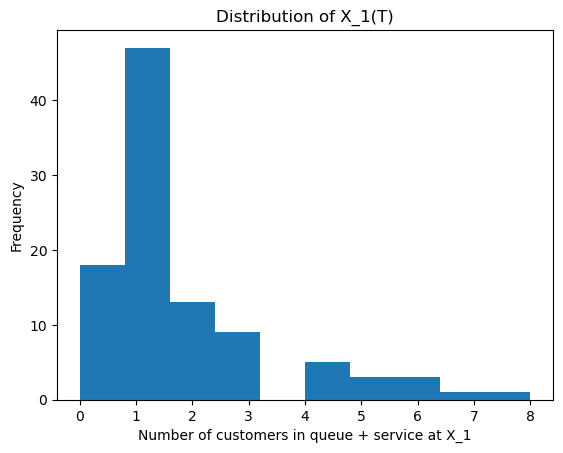

In [163]:
plt.hist(x1)
plt.xlabel("Number of customers in queue + service at X_1")
plt.ylabel("Frequency")
plt.title("Distribution of X_1(T)")
plt.show()

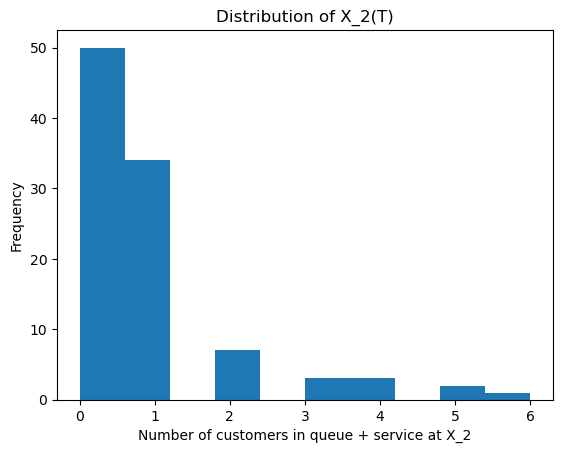

In [164]:
plt.hist(x2)
plt.xlabel("Number of customers in queue + service at X_2")
plt.ylabel("Frequency")
plt.title("Distribution of X_2(T)")
plt.show()

In [165]:
#queueing markov chain via holding times

M = 100
x1 = np.zeros(M)
x2 = np.zeros(M)

lam = 1
mu1 = 2
mu2 = 3
p = 0.2

directions = {1 : np.array([1, 0]),
              2 : np.array([-1, 1]),
              3 : np.array([0, -1]),
              4 : np.array([1, -1])}


for i in range(M):

    t = 0
    T = 10
    state = np.array([0, 0])

    while (t < T):
        if (state[0] == 0 and state[1] == 0):
            #holding
            holding = np.random.exponential(1/lam)
            t += holding
            
            state = np.add(state, directions[1])

        elif (state[0] != 0 and state[1] == 0):
            arrival = np.random.exponential(1/lam)
            q1_completion = np.random.exponential(1/mu1)

            minimum = np.min([arrival, q1_completion])
            t += minimum

            if (arrival == minimum):
                state = np.add(state, directions[1])
            else:
                state = np.add(state, directions[2])

        elif (state[0] == 0 and state[1] != 0):
            arrival = np.random.exponential(1/lam)
            q2_happy = np.random.exponential(1/(mu2 * (1-p)))
            q2_unhappy = np.random.exponential(1/(mu2 * (p)))

            minimum = np.min([arrival, q2_happy, q2_unhappy])
            t += minimum

            if (arrival == minimum):
                state = np.add(state, directions[1])
            elif (q2_happy == minimum):
                state = np.add(state, directions[3])
            else:
                state = np.add(state, directions[4])
            
        else:
            arrival = np.random.exponential(1/lam)
            q1_completion = np.random.exponential(1/mu1)
            q2_happy = np.random.exponential(1/(mu2 * (1-p)))
            q2_unhappy = np.random.exponential(1/(mu2 * (p)))

            minimum = np.min([arrival, q1_completion, q2_happy, q2_unhappy])
            t += minimum

            if (arrival == minimum):
                state = np.add(state, directions[1])
            elif (q1_completion == minimum):
                state = np.add(state, directions[2])
            elif (q2_happy == minimum):
                state = np.add(state, directions[3])
            else:
                state = np.add(state, directions[4])
    
    x1[i] = state[0]
    x2[i] = state[1]


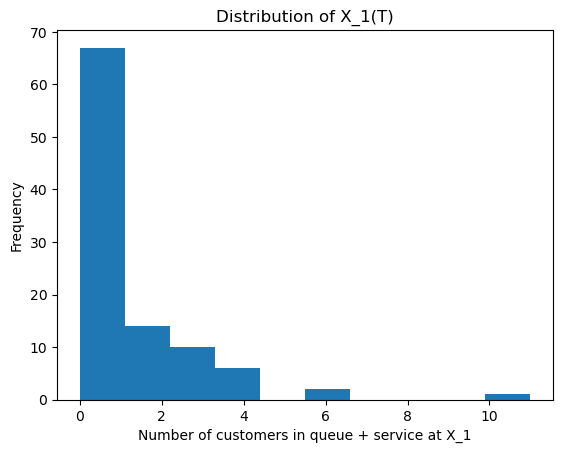

In [166]:
plt.hist(x1)
plt.xlabel("Number of customers in queue + service at X_1")
plt.ylabel("Frequency")
plt.title("Distribution of X_1(T)")
plt.show()

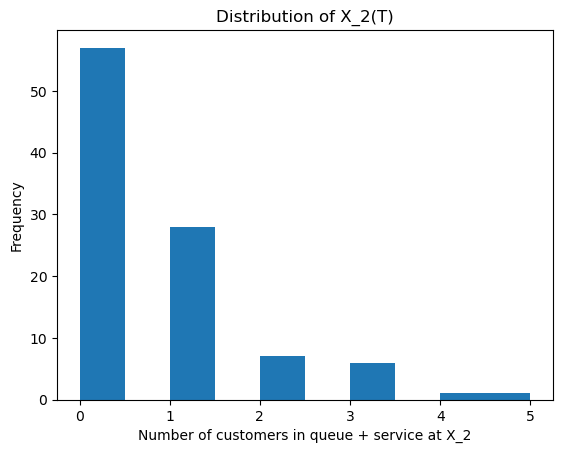

In [167]:
plt.hist(x2)
plt.xlabel("Number of customers in queue + service at X_2")
plt.ylabel("Frequency")
plt.title("Distribution of X_2(T)")
plt.show()

In [256]:
# problem 3

N = 1000
w = np.zeros(N)
s = np.zeros(N)
x = np.zeros(N)

for i in range(1, N):
    x[i] = np.random.exponential(2)
    s[i] = np.random.exponential(1/2) + np.random.exponential(1/2) + np.random.exponential(1/2)

for i in range(1, N):
    w[i] = max(0, w[i-1] + s[i-1] - x[i])

print(f"long run average waiting time: {np.sum(w[100:N])/(N-100)}")

long run average waiting time: 3.836272399263599
